# Retrieve Data and Apply Linear Algorithm

This notebook demonstrates running a machine learning algorithm (linear normalization) on data retrieved from Dataverse.

In [1]:
from azure.identity import InteractiveBrowserCredential 
from PowerPlatform.Dataverse.client import DataverseClient  
import numpy as np

In [2]:
# Connect to Dataverse
credential = InteractiveBrowserCredential()
client = DataverseClient("https://ecellorsdev.crm8.dynamics.com", credential)

In [3]:
# Fetch account data as paged batches
account_batches = client.get(
    "account",
    select=["accountid", "revenue"],
    top=10,
)

In [4]:
revenues = []
for batch in account_batches:
    for account in batch:
        if "revenue" in account and account["revenue"] is not None:
            revenues.append(account["revenue"])

revenues = np.array(revenues)
print(f"Retrieved {len(revenues)} revenue values")

Retrieved 10 revenue values


In [5]:
# Apply a simple linear algorithm: Normalize the revenues
if len(revenues) > 0:
    min_rev = np.min(revenues)
    max_rev = np.max(revenues)
    normalized_revenues = (revenues - min_rev) / (max_rev - min_rev)
    print("Normalized Revenues:", normalized_revenues)

Normalized Revenues: [1.         0.11111111 0.55555556 0.77777778 0.         1.
 0.55555556 0.88888889 0.         0.        ]


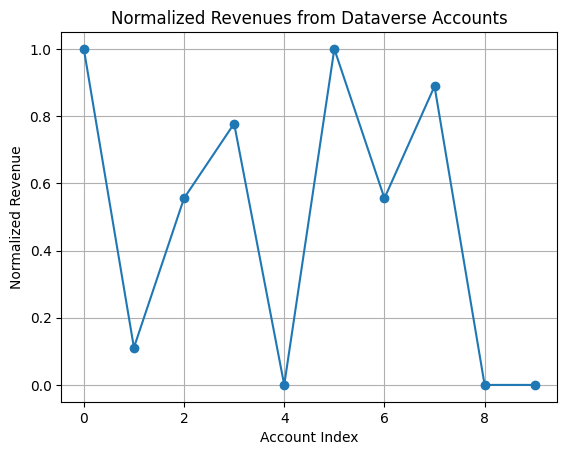

In [6]:
# Visualize the result
import matplotlib.pyplot as plt 
plt.plot(normalized_revenues, marker='o')
plt.title('Normalized Revenues from Dataverse Accounts')
plt.xlabel('Account Index')
plt.ylabel('Normalized Revenue')
plt.grid()
plt.show()